<a href="https://colab.research.google.com/github/SnekhaB/E-Commerce_Customer_Segmentation/blob/main/E_commerce_Customer_Segmentation_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/e_Comm_data.csv',encoding = ' windows-1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#Dropping null values
df.dropna(subset = ["CustomerID"], axis = 0, inplace = True)
df.dropna(subset = ["Description"], axis = 0, inplace = True)

In [5]:
df['CustomerID'].astype(int)
df['Description'].astype(str)

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [6]:
df.duplicated('Description').sum()

402933

In [7]:
df.drop_duplicates('Description',inplace = True)

**Pre-processing the data**

## **Some common Problems**


1.Remove Punctuation

2.Replace short words

3.Making text lower case

4.Remove stopwords

5.Lemmatization

### **Removing Punctuation**

In [8]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
527067              LETTER "W" BLING KEY RING
527069              LETTER "Z" BLING KEY RING
530382         PINK CRYSTAL SKULL PHONE CHARM
537621     CREAM HANGING HEART T-LIGHT HOLDER
540421            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 3896, dtype: object

In [9]:
#df['description_processed'] = df['Description'].str.replace('[^a-zA-Z0-9]', " ")
df['description_processed'] = df['Description'].str.replace('[^a-zA-Z]', " ")

<ipython-input-9-5e592c9ad651>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description_processed'] = df['Description'].str.replace('[^a-zA-Z]', " ")


In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART T LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART
...,...,...,...,...,...,...,...,...,...
527067,580691,90214W,"LETTER ""W"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,LETTER W BLING KEY RING
527069,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,LETTER Z BLING KEY RING
530382,580865,90089,PINK CRYSTAL SKULL PHONE CHARM,12,12/6/2011 11:58,0.19,17914.0,United Kingdom,PINK CRYSTAL SKULL PHONE CHARM
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom,CREAM HANGING HEART T LIGHT HOLDER


### **Replacing short words**

In [11]:
df['description_processed'] = df['description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,WHITE HANGING HEART LIGHT HOLDER
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART
...,...,...,...,...,...,...,...,...,...
527067,580691,90214W,"LETTER ""W"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,LETTER BLING KEY RING
527069,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,LETTER BLING KEY RING
530382,580865,90089,PINK CRYSTAL SKULL PHONE CHARM,12,12/6/2011 11:58,0.19,17914.0,United Kingdom,PINK CRYSTAL SKULL PHONE CHARM
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom,CREAM HANGING HEART LIGHT HOLDER


In [12]:
df['description_processed']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
527067                  LETTER BLING KEY RING
527069                  LETTER BLING KEY RING
530382         PINK CRYSTAL SKULL PHONE CHARM
537621       CREAM HANGING HEART LIGHT HOLDER
540421              PAPER CRAFT LITTLE BIRDIE
Name: description_processed, Length: 3896, dtype: object

### **Lowercase Character**

In [13]:
df.description_processed = [description.lower() for description in df.description_processed]

In [14]:
df['description_processed']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
527067                  letter bling key ring
527069                  letter bling key ring
530382         pink crystal skull phone charm
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: description_processed, Length: 3896, dtype: object

### **Remove stop words**

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

add_words = ['set','design','heart','red','blue','pink','white','black','dark','pack','yellow','orange','hanging','letter','cream'] #custom list of words to be removed
# Adding to the list of words
stopwords.extend(add_words)

#to remove stop words
def remove_stopwords(descr):
  desc_token = word_tokenize(descr)
  des_new = " ".join([i for i in desc_token if i not in stop_words])
  return des_new
# Removing stopwords
df['description_processed'] = [remove_stopwords(des) for des in df['description_processed']]
df['description_processed']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                light holder
1                               metal lantern
2                    cupid hearts coat hanger
3         knitted union flag hot water bottle
4                               woolly hottie
                         ...                 
527067                         bling key ring
527069                         bling key ring
530382              crystal skull phone charm
537621                           light holder
540421              paper craft little birdie
Name: description_processed, Length: 3896, dtype: object

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Lemmatization**

In [30]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

#finds the part of speech tag
#convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sent(sentence):
   # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word,tag in wordnet_tagged:
      if tag is None:
        lemmatized_sentence.append(word)
      else:
        lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)

df['description_processed'] = df['description_processed'].apply(lambda x: lemmatize_sent(x) )


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
df['description_processed']

0                             light holder
1                            metal lantern
2                  cupid heart coat hanger
3         knit union flag hot water bottle
4                            woolly hottie
                        ...               
527067                      bling key ring
527069                      bling key ring
530382           crystal skull phone charm
537621                        light holder
540421           paper craft little birdie
Name: description_processed, Length: 3896, dtype: object

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,woolly hottie


### **Plotting frequent words**

<function matplotlib.pyplot.show(close=None, block=None)>

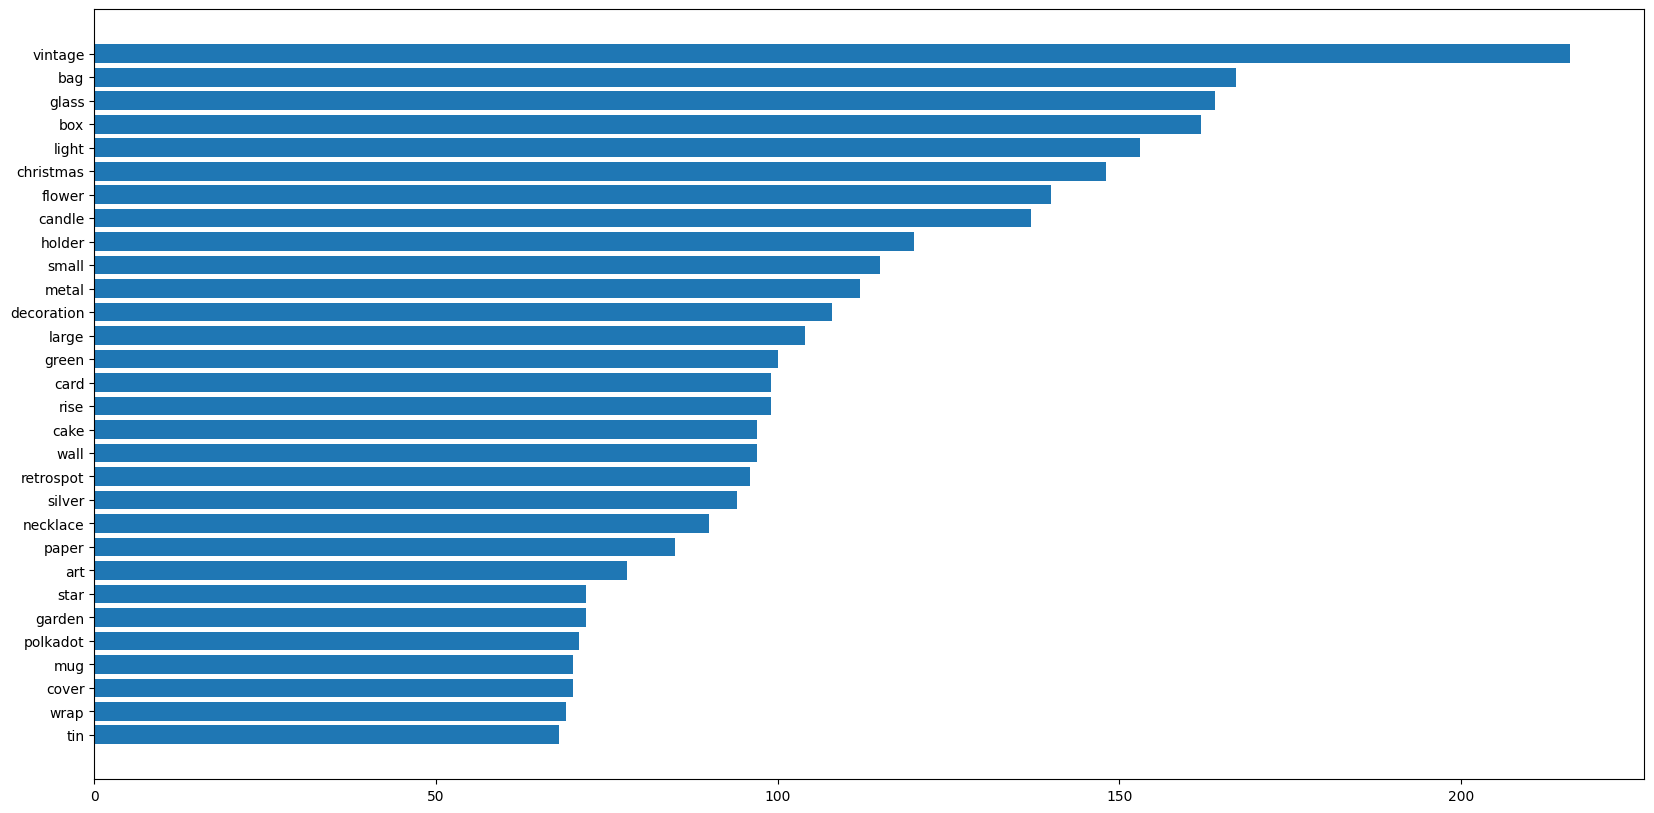

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist

all_words = " ".join([text for text in df['description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word' : list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns='count',n=30)
words_df.sort_values('count', inplace=True)

#plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show

### **WordCloud**

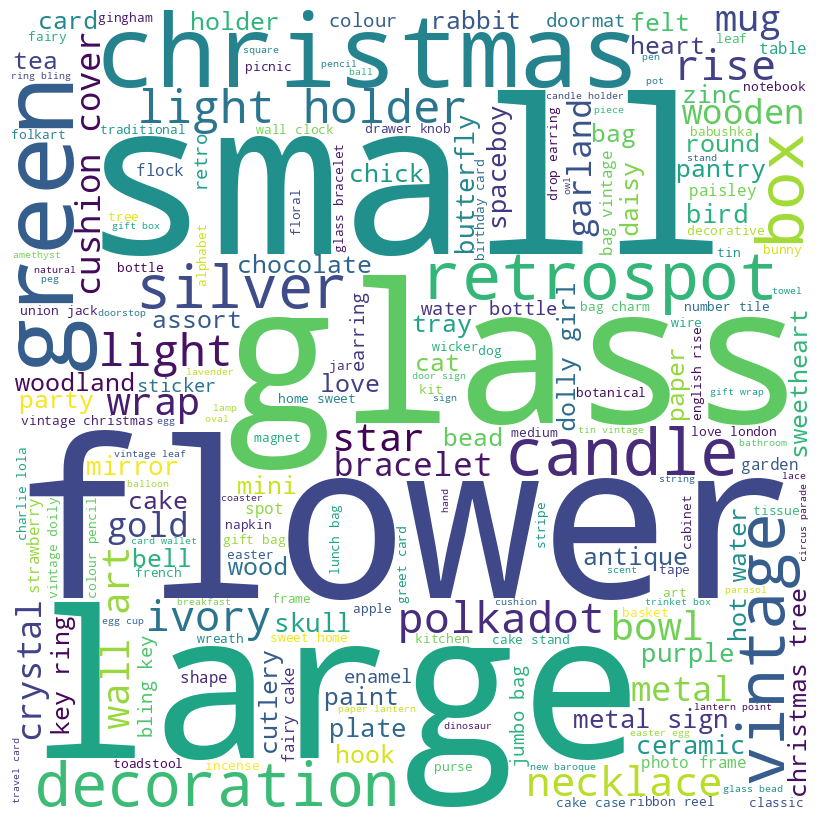

In [43]:
#Buiding a wordcloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['description_processed']])

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()